# Lab-9: Linear Discriminant Analysis (LDA) — Dimensionality Reduction

We will implement LDA step-by-step on the provided 2D samples for two classes ω1 and ω2, compute all intermediate matrices (means, covariances, scatter matrices), obtain the projection direction, project points, and visualize before/after. Results will also be saved into a plain text file for a “notepad-style” summary.

Checklist
- Display the two classes in 2D
- Compute class means μ1, μ2
- Compute covariance matrices S1, S2
- Compute within-class scatter SW = S1 + S2
- Compute between-class scatter SB = (μ1 − μ2)(μ1 − μ2)^T
- Solve generalized eigenproblem SW^{-1} SB w = λ w and get the largest eigenvector w
- Project all points onto w and visualize
- Save a clear step-by-step text summary

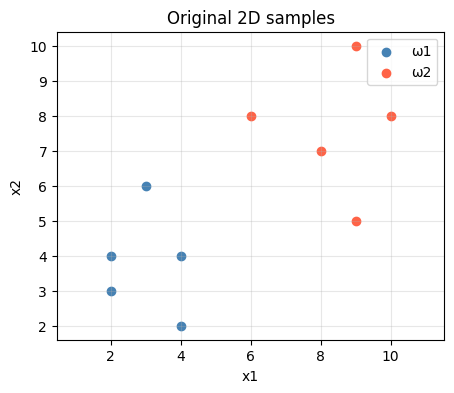

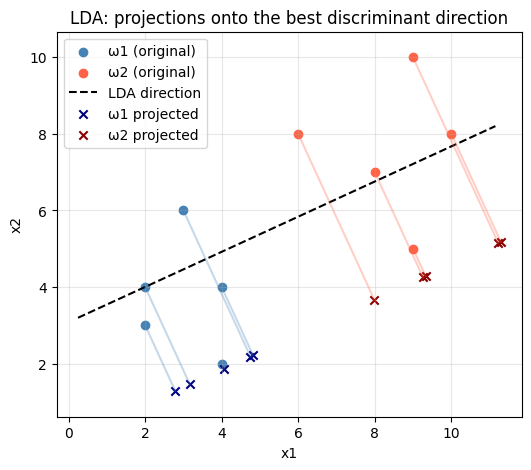

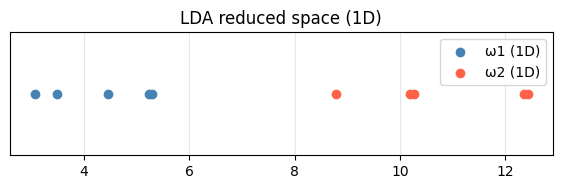

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig, inv, norm


w1 = np.array([[4,2],[2,4],[2,3],[3,6],[4,4]], dtype=float)
w2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]], dtype=float)


plt.figure(figsize=(5,4))
plt.scatter(w1[:,0], w1[:,1], color='steelblue', label='ω1')
plt.scatter(w2[:,0], w2[:,1], color='tomato', label='ω2')
plt.title('Original 2D samples')
plt.xlabel('x1'); plt.ylabel('x2'); plt.axis('equal'); plt.grid(True, alpha=0.3); plt.legend()
plt.show()

#Class means μ1 and μ2
mu1 = w1.mean(axis=0)
mu2 = w2.mean(axis=0)


S1 = np.cov(w1.T, bias=False)
S2 = np.cov(w2.T, bias=False)

# Within-class scatter SW = S1 + S2
SW = S1 + S2

# Between-class scatter SB = (μ1 − μ2)(μ1 − μ2)^T
mean_diff = (mu1 - mu2).reshape(-1,1)
SB = mean_diff @ mean_diff.T


M = inv(SW) @ SB
vals, vecs = eig(M)

# Pick the eigenvector with the largest eigenvalue (real part)
idx = np.argmax(vals.real)
w = vecs[:, idx].real
# normalize for readability
w = w / norm(w)

#  Project every 2D sample onto w
proj_w1 = w1 @ w
proj_w2 = w2 @ w

# Reconstruct as 2D points along the line for visualization
w_line = w.reshape(2,1)
w1_proj_points = np.outer(proj_w1, w)  # back to 2D along direction w
w2_proj_points = np.outer(proj_w2, w)

# Visualize the projections in 2D (points and their shadows on the LDA line)
plt.figure(figsize=(6,5))
plt.scatter(w1[:,0], w1[:,1], color='steelblue', label='ω1 (original)')
plt.scatter(w2[:,0], w2[:,1], color='tomato', label='ω2 (original)')

# Draw the LDA line through the global mean
global_mean = (mu1 + mu2)/2
line_points = np.vstack([global_mean - 6*w, global_mean + 6*w])
plt.plot(line_points[:,0], line_points[:,1], 'k--', label='LDA direction')

# Projections (shadows) on the line
plt.scatter(w1_proj_points[:,0], w1_proj_points[:,1], color='navy', marker='x', label='ω1 projected')
plt.scatter(w2_proj_points[:,0], w2_proj_points[:,1], color='darkred', marker='x', label='ω2 projected')

# Draw connectors from each point to its projection
for p, q in zip(w1, w1_proj_points):
    plt.plot([p[0], q[0]], [p[1], q[1]], color='steelblue', alpha=0.3)
for p, q in zip(w2, w2_proj_points):
    plt.plot([p[0], q[0]], [p[1], q[1]], color='tomato', alpha=0.3)

plt.title('LDA: projections onto the best discriminant direction')
plt.xlabel('x1'); plt.ylabel('x2'); plt.axis('equal'); plt.grid(True, alpha=0.3); plt.legend()
plt.show()

# 1D visualization of projected values
plt.figure(figsize=(7,1.6))
plt.scatter(proj_w1, np.zeros_like(proj_w1), color='steelblue', label='ω1 (1D)')
plt.scatter(proj_w2, np.zeros_like(proj_w2), color='tomato', label='ω2 (1D)')
plt.yticks([])
plt.title('LDA reduced space (1D)')
plt.grid(True, axis='x', alpha=0.3)
plt.legend(loc='upper right')
plt.show()

